In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#Loading of Data

In [57]:
df=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/preprocessData.csv')
df.head()

,Ratings,Reviews,Movies,Reviews_clean
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,disclaimer watched movie conditional agreement...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,writing hopes gets previous review film find s...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,write scathing review turd sandwich instead go...
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,saw previous spoof movies horrible gentlemen k...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,movie saw day early free feel like got ripped ...


#Feature Engineering

In [3]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [4]:
#Importing dependencies for feature engineering
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
df.sample(5)

,Ratings,Reviews,Movies,Reviews_clean,Label
42666,3.0,I give this 3 stars mostly because of the acti...,Trapped Ashes,stars acting truly think acting great movie ma...,0
22266,2.0,Every year March brings the promise of warmer ...,Olympus Has Fallen,year march brings promise warmer weather annua...,0
17011,2.0,The first time I saw this movie was in a theat...,Street Fighter,time saw movie theater fourth grade course ide...,0
134812,9.0,This comedy mashes up a depressing situation m...,大老婆的瘋狂反擊,comedy mashes depressing situation people face...,1
103170,7.0,It may not be the greatest movie but I've alwa...,Wholly Moses!,not greatest movie enjoyed watching lot famili...,1


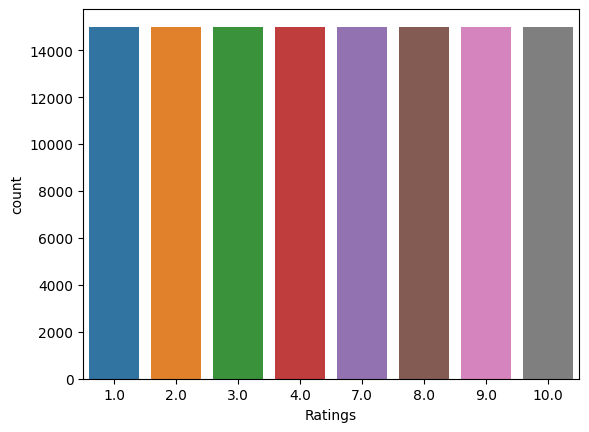

1.0     15000
2.0     15000
4.0     15000
3.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [6]:
#Checking for Class Imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

In [7]:
df['Reviews_clean'].describe()

count                                                119999
unique                                               119810
top       story soundtrack dialog graphic reasonableness...
freq                                                     10
Name: Reviews_clean, dtype: object

In [8]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Reviews_clean     1
Label             0
dtype: int64

In [9]:
df.dropna(subset=['Reviews_clean'], inplace=True)

In [10]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Reviews_clean     0
Label             0
dtype: int64

In [11]:
data.dropna(subset=['Reviews_clean'], inplace=True)

In [12]:
data.isna().sum()

Reviews_clean    0
Label            0
dtype: int64

#Lemmatization

In [13]:
# lemmatization of word
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

#Vectoization with Count Vectorizer and TDIDF Vectorizer with Unigram

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with unigram

In [34]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |  0.08261680934871402  |
|   absolutely   |  -0.06319132858943727 |
|      act       |  -0.15216857844619466 |
|     acting     |  -0.19584996544459282 |
|     action     |   0.2648438384718285  |
|     actor      |  -0.15949011672127736 |
|    actress     |  -0.11480645302084821 |
|    actually    |  -0.0376635092967506  |
|      add       |  -0.02769386397723844 |
|     adult      |  0.08620513098553836  |
|      age       |  0.11435712217826692  |
|     alien      | -0.052881666675052626 |
|    amazing     |   0.7321517644490821  |
|    american    |  0.06151729013916173  |
|   animation    |  -0.14597999428782527 |
|    annoying    |  -0.7227851093626656  |
|      art       |  0.007113022253183335 |
|     aspect     |  -0.04021278620245126 |
|    attempt     |  -0.6157176570574923  |
|   attention    |   0.357560447920293   |
|    audien

#Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram

In [35]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------+-----------------------+
|  Feature   |         Score         |
+------------+-----------------------+
|    able    |   0.4540317184430114  |
| absolutely |  -0.28875441845533034 |
|    act     |  -0.9230714163958927  |
|   acting   |  -1.7375982866059057  |
|   action   |   2.4822997939410656  |
|   actor    |  -1.5958436173938946  |
|  actress   |  -0.6736546968657668  |
|  actually  |  -0.23769169247171326 |
|    add     |  -0.13052590375469156 |
|   adult    |   0.795142098547394   |
|    age     |   0.6670872201240665  |
|   alien    |  -0.21953175561915328 |
|  amazing   |   4.090551320739057   |
|  american  |   0.4483553845070378  |
| animation  |  -0.2519284766037166  |
|  annoying  |  -3.6393092912228675  |
|    art     |  0.38723688765003494  |
|   aspect   |  -0.10906454392344761 |
|  attempt   |  -3.7270950368253852  |
| attention  |   1.8883090832240792  |
|  audience  |  0.07902133869323413  |
|  average   |  -1.2400270336337382  |
|    away    |  0.4028530

#Vectorization with Count Vectorizer and TDIDF Vectorizer with Bigram

In [36]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with Bigram

In [37]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------+-----------------------+
|     Feature      |         Score         |
+------------------+-----------------------+
|  academy award   |   0.8603943906375455  |
|     act like     |  -0.41262162315273815 |
|    acting bad    |  -1.4648925168000388  |
|   acting good    |   0.7714600889338423  |
|   acting great   |    1.1228130473719    |
|   acting movie   |  -0.5209800499871128  |
|    acting not    |  -0.42809221062719316 |
|   action film    |  0.33843981150929764  |
|   action flick   |  0.27001632152242844  |
|   action movie   |  0.31620202167912315  |
|  action packed   |   1.352417534218189   |
|   action scene   |  0.16302144506420038  |
| action sequence  |  0.05197213375336817  |
|  actor actress   |  -0.19731414653141838 |
|   actor movie    |  -0.2805758744947059  |
|    actor not     |  -0.48860026179649363 |
|  actually good   |  0.013657508451556246 |
|   actually not   |  -0.12635646308899684 |
|   adam sandler   |  0.24331314878800012  |
|      ai 

#Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram

In [38]:
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+------------------+----------------------+
|     Feature      |        Score         |
+------------------+----------------------+
|  academy award   |  1.765635610631508   |
|     act like     | -1.0296771726565648  |
|    acting bad    | -3.1442720348358435  |
|   acting good    |  1.6017465100513815  |
|   acting great   |  2.263804039814213   |
|   acting movie   | -1.0013094546491563  |
|    acting not    | -1.0999511035086222  |
|   action film    |  1.0396726591342353  |
|   action flick   |  0.6862413523771015  |
|   action movie   |  0.9239226971916583  |
|  action packed   |  2.9366909053418224  |
|   action scene   | 0.47168268615787534  |
| action sequence  |   0.28520662808154   |
|  actor actress   | -0.35627935094273394 |
|   actor movie    | -0.48605170171804324 |
|    actor not     |  -1.068873417756824  |
|  actually good   | 0.19268692258332643  |
|   actually not   | -0.2729544369982471  |
|   adam sandler   |  1.012514017613526   |
|      ai not      | 0.053815676

#Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram

In [39]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

#Feature Importance with Logistic Regression and Count Vectorizer with Trigram

In [40]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------------+-----------------------+
|           Feature           |         Score         |
+-----------------------------+-----------------------+
|        acting not bad       |  -0.6223838768231345  |
|       acting not good       |  -1.4509388663916811  |
|       acting not great      |  -0.7888352799203482  |
|      acting pretty good     |   0.7847441208027779  |
|    acting special effect    |  -0.6063212496785975  |
|        acting sub par       |   -0.696678035312623  |
|       action film not       |  0.22354140823185975  |
|       action movie not      |   0.7457683281395308  |
|       action scene not      |  -0.20429729677338015 |
|       action set piece      |   1.104468365098928   |
|      action take place      | -0.032450203169957614 |
|        actor good job       |   0.705644442019823   |
|       actor great job       |   1.5190322623384582  |
|       actor look like       |  -1.7240600113075342  |
|       actually not bad      |  -0.732513788117

#Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [41]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------------+------------------------+
|           Feature           |         Score          |
+-----------------------------+------------------------+
|        acting not bad       |  -0.8546622419943468   |
|       acting not good       |   -1.737080626883685   |
|       acting not great      |  -0.8329366585209749   |
|      acting pretty good     |   0.8015528342460742   |
|    acting special effect    |  -0.6007349951192089   |
|        acting sub par       |  -0.7465674347973004   |
|       action film not       |   0.2639383748356925   |
|       action movie not      |   0.871539504228067    |
|       action scene not      |  -0.16111180916458737  |
|       action set piece      |   1.1987849742272592   |
|      action take place      | -0.047061743368903966  |
|        actor good job       |   0.7511797085571982   |
|       actor great job       |   1.6911002391393455   |
|       actor look like       |  -1.9222399433083603   |
|       actually not bad      |

#Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram

In [19]:
%%time
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
# countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
# x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
# x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']


CPU times: user 4min 10s, sys: 8.32 s, total: 4min 18s
Wall time: 4min 43s


In [23]:
y_train.head()

114310    1
44477     0
94541     1
49390     0
103363    1
Name: Label, dtype: object

In [20]:
x_train_tfidf[:5]

array([[0.       , 0.       , 0.0416398, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [21]:
# file_path = '/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/x_train_tfidf'

# # Save the array to a file
# np.save(file_path, x_train_tfidf)

In [22]:
# file_path = '/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/x_test_tfidf'

# # Save the array to a file
# np.save(file_path, x_test_tfidf)

In [26]:
# y_train.to_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/y_train.csv', index=False)

In [27]:
# y_test.to_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/y_test.csv', index=False)

#Feature Selection with Chi squared

In [19]:
%%time
from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

Streaming output truncated to the last 5000 lines.
	. germany
	. second
	. lloyd
	. grey
	. vulgar
	. hunter
	. known
	. scenery
	. frequent
	. increasingly
	. airplane
	. tiny
	. journalist
	. magazine
	. fame
	. karate
	. spider
	. jumping
	. religious
	. mall
	. staying
	. took
	. luckily
	. flying
	. finding
	. meat
	. prior
	. cousin
	. agenda
	. jungle
	. mode
	. evil
	. ball
	. excitement
	. photography
	. fashion
	. virgin
	. presence
	. mini
	. e
	. dig
	. committed
	. pre
	. exposed
	. confusion
	. unit
	. ego
	. broke
	. wound
	. national
	. fix
	. lewis
	. one
	. strike
	. undercover
	. shape
	. twin
	. spring
	. saturday
	. naturally
	. fighter
	. dr
	. mexican
	. doctor
	. impossible
	. join
	. opposite
	. likely
	. table
	. prisoner
	. post
	. training
	. reboot
	. christ
	. arrives
	. heaven
	. seek
	. extremely
	. trap
	. wan
	. large
	. order
	. recommendation
	. occurs
	. class
	. intentional
	. similarly
	. flight
	. prevent
	. authority
	. planning
	. trouble
	. tu

In [20]:
df.to_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/featureEngineering.csv', index=False)

#Model Selection

In [20]:
# Import prerequisite libraries
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Logistic Regression Model

In [21]:
model_1=LogisticRegression()

In [22]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 1min 42s, sys: 3.68 s, total: 1min 46s
Wall time: 1min 7s


LogisticRegression()

##Evaluation on Test and Train dataset

In [23]:
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9055226847938666
AUC Score on training dateset for Logistic Regression: 0.966129122872469
F1 Score ftraining dateset for Logistic Regression: 0.9055205195480222
Precision Score on test for Logistic Regression: 0.8890555555555556
AUC Score on test for Logistic Regression: 0.9547890054540317
F1 Score for Logistic Regression: 0.8890565088782376
CPU times: user 7.55 s, sys: 456 ms, total: 8.01 s
Wall time: 10.2 s


#Decision Tree Classifier

In [25]:
%%time
model_2 = Pipeline(
    steps=[
        # ("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

model_2.fit(x_train_tfidf,y_train)

CPU times: user 7min 39s, sys: 1.36 s, total: 7min 40s
Wall time: 8min 1s


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

##Evaluation on test data and training data of Decision Tree Classifier

In [27]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.9999285705782212
AUC Score on training dateset for Decision Tree Classifier: 0.9999999875279468
F1 Score training dateset for Decision Tree Classifier: 0.9999285705733417
Precision Score on test for Decision Tree Classifier: 0.7186666666666667
AUC Score on test for Decision Tree Classifier: 0.7193750310796763
F1 Score for Decision Tree Classifier: 0.7186697231662122
CPU times: user 5.91 s, sys: 1.45 s, total: 7.37 s
Wall time: 7.63 s


##Decision Tree Classifier with max depth 11 to fix overfit

In [ ]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [ ]:
%%time
model_3.fit(x_train_tfidf,y_train)

In [ ]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

#Random Forest Classifier

In [31]:
%%time
model_4 = Pipeline(
    steps=[
        ("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    # ("classifier", RandomForestClassifier())
    ]
)
model_4.fit(x_train_tfidf,y_train)


CPU times: user 1min 49s, sys: 1.08 s, total: 1min 50s
Wall time: 1min 56s


Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, min_samples_split=3))])

##Evaluation on test data and training data of Random Forest Classifier

In [32]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.8605935784949821
AUC Score on training dateset for Random Forest Classifier: 0.9380022084831596
F1 Score training dateset for Random Forest Classifier: 0.8604948682647905
Precision Score on test for Random Forest Classifier: 0.8280833333333333
AUC Score on test for Random Forest Classifier: 0.9072565714824345
F1 Score for Random Forest Classifier: 0.828024219675171
CPU times: user 16.7 s, sys: 1.51 s, total: 18.2 s
Wall time: 24.1 s


#Hyperparameter Tunning with Grid Search

In [29]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

##Hyperparameter tunning of Logistic Regression

In [25]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

In [ ]:
%%time
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

#Save model

In [26]:
import pickle
file_path = '/content/drive/MyDrive/Sentiment Analysis(imdb data)/Model/my_model.pkl'

# Save the model to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(model_1, file)

In [30]:
model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)


In [31]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 3min 17s, sys: 7.9 s, total: 3min 25s
Wall time: 2min 32s


LogisticRegression(C=10, max_iter=200)

In [32]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))


Precision Score for Logistic Regression: 0.8849444444444444
Recall Score for Logistic Regression: 0.8849444444444444
AUC Score for Logistic Regression: 0.9531663820652359
F1 Score for Logistic Regression: 0.8849453031227161
Accuracy Score for Logistic Regression: 0.8849444444444444
CPU times: user 3.72 s, sys: 161 ms, total: 3.88 s
Wall time: 6.67 s


In [36]:
import pickle
file_path = '/content/drive/MyDrive/Sentiment Analysis(imdb data)/Model/my_model2.pkl'

# Save the model to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(model_1, file)

In [33]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

In [42]:
train.head()

,Reviews_clean,Label
114310,subject world inherently interesting uninteres...,1
44477,reviews booksequalhappiness blogspot comreview...,0
94541,thumbs director stars george jungle funniest c...,1
49390,seventh entry series letdown especially lively...,0
103363,interesting story set stunning backdrop not li...,1


In [44]:
test.head()

,Reviews_clean,Label
58013,town leffert corners plagued unearthly beings ...,0
95260,hilarious touching entertaining sweet sums fre...,1
107956,film not greatest plots horror gore fans nice ...,1
7169,worst movies seen absolutely suspense lot bad ...,0
103438,pretty good mystery thriller obviously low bud...,1


In [45]:
y_test_list=y_test.tolist()
y_predict_list=y_predict.tolist()
test_list=test['Reviews_clean'].tolist()


In [46]:
rating_list=test['Label'].tolist()

In [49]:
y_test_list[:5]

['0', '1', '1', '0', '1']

In [50]:
y_predict_list[:5]

['0', '1', '1', '0', '1']

In [51]:
test_list[:5]

['town leffert corners plagued unearthly beings decades people left including local priest woman traumatized death sister john martense turns claim illicit family fortune bad guys pursuit stand lot complicated let film great cast pretty good creature effects gets impression not moon film actually alright book lurker lobby guide cinema h p lovecraft andrew migliore john strysik write moon films lurking fear trailer better feature promotes unfortunate joyner wonderful professional cast cleaned script hands producer film standout lovecraft adaptations yep exactly instead boring poorly looks cheaper probably knowing moon probably half crew working free michael doyle bit kind saying film preserves lovecraft themes madness inbreeding hereditary degeneration quick assert film particularly remarkable asks question ask hands stuart gordon dennis paoli lovecraft gem disposable mess',
 'hilarious touching entertaining sweet sums fred claus david dobkin deserves kudos directing sensitive subject l

#Confusion metrics

In [34]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

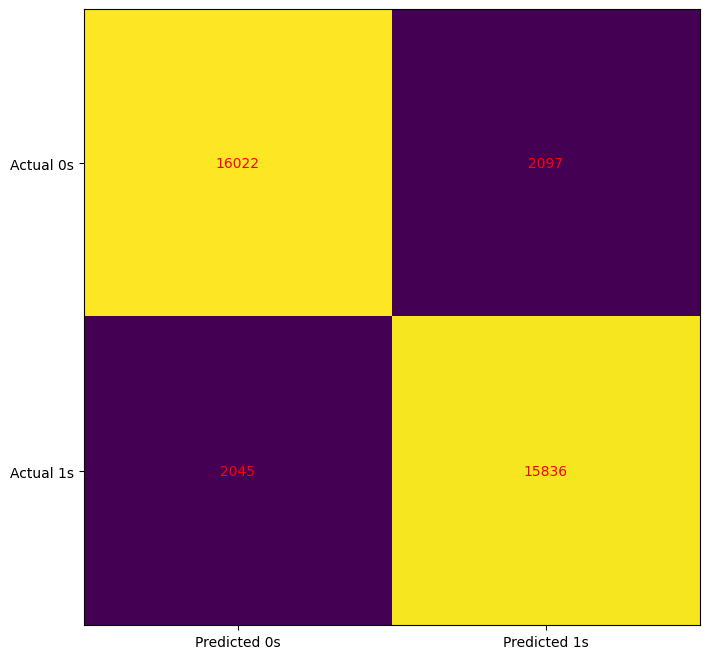

In [35]:
confusion_matrix_plot(y_test,y_predict)

#Analyzing False Positive and False Negative

In [38]:
!pip install colorama

In [53]:
type(y_test_list)

list

In [54]:
for i in range(0,5):
  print(y_test_list[i])

0
1
1
0
1
